# hubble/fits

using [astropy.io.fits](https://docs.astropy.org/en/stable/io/fits/)

In [1]:
import os
import numpy as np
from astropy.io import fits
from abcli import file
from abcli import fullname
from abcli import string
from abcli.modules import objects
from abcli.plugins import seed
from hubble import NAME, VERSION
from hubble.fits import ingest

import abcli.logging
import logging

logger = logging.getLogger()

logger.info(f"{NAME}.{VERSION}.{fullname()}, built on {string.pretty_date()}")

Found credentials in shared credentials file: ~/.aws/credentials
hubble.3.14.1.abcli-7.2325.1-unknown, built on 13 September 2023, 20:39:59


In [2]:
object_name = "hubble-download-val-2023-09-10-v5"

In [3]:
!echo $abcli_object_root

In [4]:
HOME=os.getenv("HOME")
%env abcli_object_name={object_name}
%env abcli_object_root={HOME}/storage/abcli
%env abcli_object_path={HOME}/storage/abcli/{object_name}

env: abcli_object_name=hubble-download-val-2023-09-10-v5
env: abcli_object_root=/Users/kamangir/storage/abcli
env: abcli_object_path=/Users/kamangir/storage/abcli/hubble-download-val-2023-09-10-v5


In [5]:
%%bash -s $object_name
source ~/git/awesome-bash-cli/bash/abcli.sh in_notebook

object_name=$1

abcli select $object_name
abcli download

📂 abcli: hubble-download-val-2023-09-10-v5
hubble-download-val-2023-09-10-v5 open download started.
download: s3://kamangir/bolt/hubble-download-val-2023-09-10-v5/hubble-download-val-2023-09-10-v5 to ./hubble-download-val-2023-09-10-v5
download: s3://kamangir/bolt/hubble-download-val-2023-09-10-v5/abcli.log to ./abcli.log
hubble-download-val-2023-09-10-v5 download completed.


---

hubble.ingest(hubble-download-val-2023-09-10-v5)


Filename: /Users/kamangir/storage/abcli/hubble-download-val-2023-09-10-v5/u4ge0106r_c0m.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     251   ()      
  1  SCI           1 ImageHDU       143   (800, 800)   float32   
  2  SCI           2 ImageHDU       132   (800, 800)   float32   
  3  SCI           3 ImageHDU       132   (800, 800)   float32   
  4  SCI           4 ImageHDU       132   (800, 800)   float32   


hubble.load_fit_file(/Users/kamangir/storage/abcli/hubble-download-val-2023-09-10-v5/u4ge0106r_c0m.fits): 5 item(s)
#0: Null
#1: (800, 800)
#1: -1.999 - 6.050


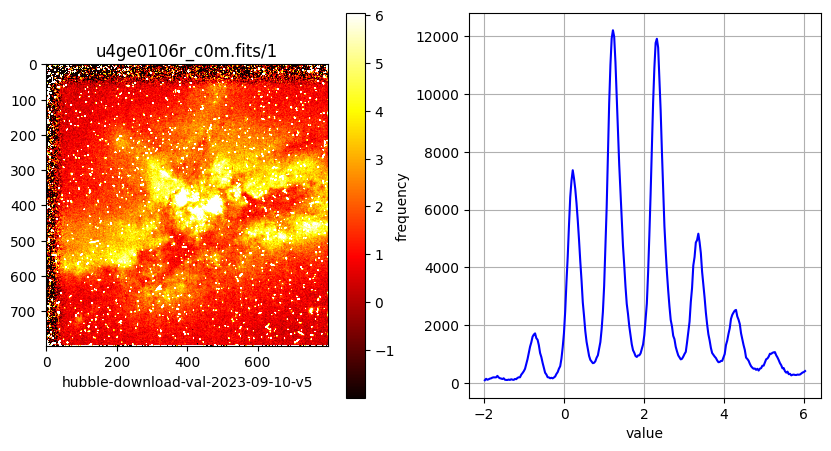

#2: (800, 800)
#2: -0.666 - 9.149
#3: (800, 800)
#3: 0.113 - 11.541
#4: (800, 800)
#4: -3.728 - 9.792


Filename: /Users/kamangir/storage/abcli/hubble-download-val-2023-09-10-v5/u4ge0106r_q1m.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      46   ()      
  1  SCI           1 ImageHDU        27   (14, 800)   int16   
  2  SCI           2 ImageHDU        27   (14, 800)   int16   
  3  SCI           3 ImageHDU        27   (14, 800)   int16   
  4  SCI           4 ImageHDU        27   (14, 800)   int16   


hubble.load_fit_file(/Users/kamangir/storage/abcli/hubble-download-val-2023-09-10-v5/u4ge0106r_q1m.fits): 5 item(s)
#0: Null
#1: (800, 14)
#1: 0.000 - 0.000


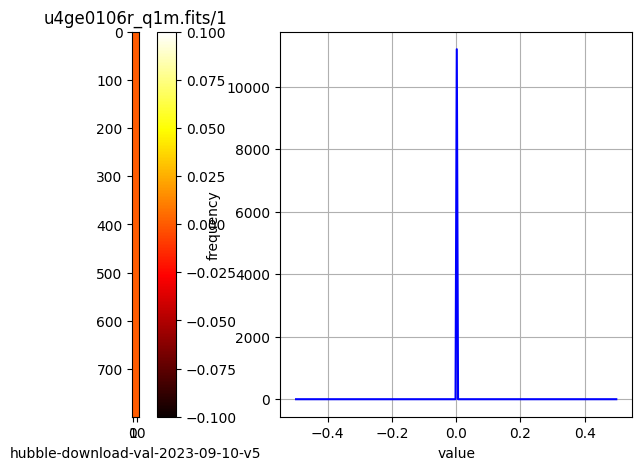

#2: (800, 14)
#2: 0.000 - 0.000
#3: (800, 14)
#3: 0.000 - 0.000
#4: (800, 14)
#4: 0.000 - 0.000


Filename: /Users/kamangir/storage/abcli/hubble-download-val-2023-09-10-v5/u4ge0106r_shm.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     351   ()      
  1  SHP           1 ImageHDU        19   (965,)   int16 (rescales to uint16)   


hubble.load_fit_file(/Users/kamangir/storage/abcli/hubble-download-val-2023-09-10-v5/u4ge0106r_shm.fits): 2 item(s)
#0: Null
#1: (965,)
skipped.


Filename: /Users/kamangir/storage/abcli/hubble-download-val-2023-09-10-v5/u4ge0106r_drz.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     355   ()      
  1  SCI           1 ImageHDU       121   (1515, 1495)   float32   
  2  WHT           1 ImageHDU       133   (1515, 1495)   float32   
  3  CTX           1 ImageHDU       132   (1515, 1495)   int32   


hubble.load_fit_file(/Users/kamangir/storage/abcli/hubble-download-val-2023-09-10-v5/u4ge0106r_drz.fits): 4 item(s)
#0: Null
#1: (1495, 1515)
#1: 0.000 - 0.011


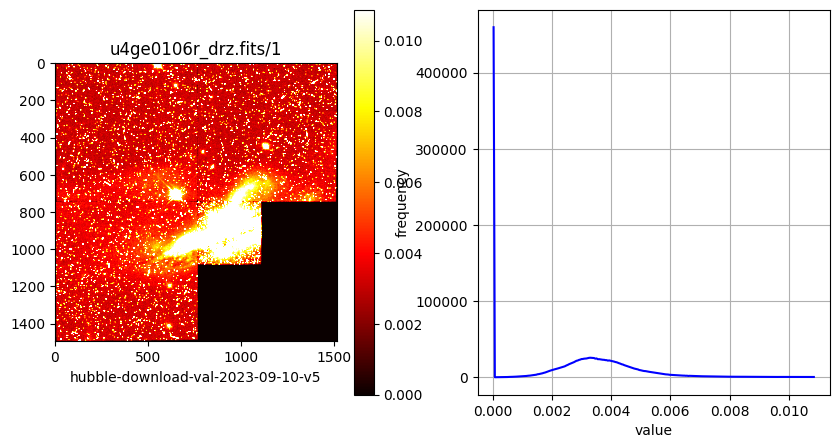

#2: (1495, 1515)
#2: 0.000 - 2440.053
#3: (1495, 1515)
#3: 0.000 - 8.000


Filename: /Users/kamangir/storage/abcli/hubble-download-val-2023-09-10-v5/u4ge0106r_c1f.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     265   (800, 800, 4)   int16   
  1  u4ge0106r_cvt.c1h.tab    1 TableHDU       402   4R x 56C   [D25.17, D25.17, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, A1, E15.7, I12, I12, D25.17, D25.17, A8, A8, I12, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, I12, I12, I12, I12, I12, I12, I12, I12, A48, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7]   


hubble.load_fit_file(/Users/kamangir/storage/abcli/hubble-download-val-2023-09-10-v5/u4ge0106r_c1f.fits): 2 item(s)
#0: (4, 800, 800)
skipped.
#1: (4,)
skipped.


Filename: /Users/kamangir/storage/abcli/hubble-download-val-2023-09-10-v5/u4ge0106r_q0f.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     263   (800, 800, 4)   int16   
  1  u4ge0106r_cvt.q0h.tab    1 TableHDU       402   4R x 56C   [D25.17, D25.17, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, A1, E15.7, I12, I12, D25.17, D25.17, A8, A8, I12, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, I12, I12, I12, I12, I12, I12, I12, I12, A48, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7]   


hubble.load_fit_file(/Users/kamangir/storage/abcli/hubble-download-val-2023-09-10-v5/u4ge0106r_q0f.fits): 2 item(s)
#0: (4, 800, 800)
skipped.
#1: (4,)
skipped.


Filename: /Users/kamangir/storage/abcli/hubble-download-val-2023-09-10-v5/u4ge0106r_c3m.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   ()      
  1                1 BinTableHDU     32   10000R x 5C   [1E, 1E, 1E, 1E, 1E]   


hubble.load_fit_file(/Users/kamangir/storage/abcli/hubble-download-val-2023-09-10-v5/u4ge0106r_c3m.fits): 2 item(s)
#0: Null
#1: (10000,)
skipped.


Filename: /Users/kamangir/storage/abcli/hubble-download-val-2023-09-10-v5/u4ge0106r_dgr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       7   ()      
  1  u4ge0106r.dgr    1 TableHDU        12   196R x 1C   [A132]   


hubble.load_fit_file(/Users/kamangir/storage/abcli/hubble-download-val-2023-09-10-v5/u4ge0106r_dgr.fits): 2 item(s)
#0: Null
#1: (196,)
skipped.


Filename: /Users/kamangir/storage/abcli/hubble-download-val-2023-09-10-v5/u4ge0106r_q0m.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     191   ()      
  1  SCI           1 ImageHDU        93   (800, 800)   int16   
  2  SCI           2 ImageHDU        93   (800, 800)   int16   
  3  SCI           3 ImageHDU        93   (800, 800)   int16   
  4  SCI           4 ImageHDU        93   (800, 800)   int16   


hubble.load_fit_file(/Users/kamangir/storage/abcli/hubble-download-val-2023-09-10-v5/u4ge0106r_q0m.fits): 5 item(s)
#0: Null
#1: (800, 800)
#1: 0.000 - 0.000


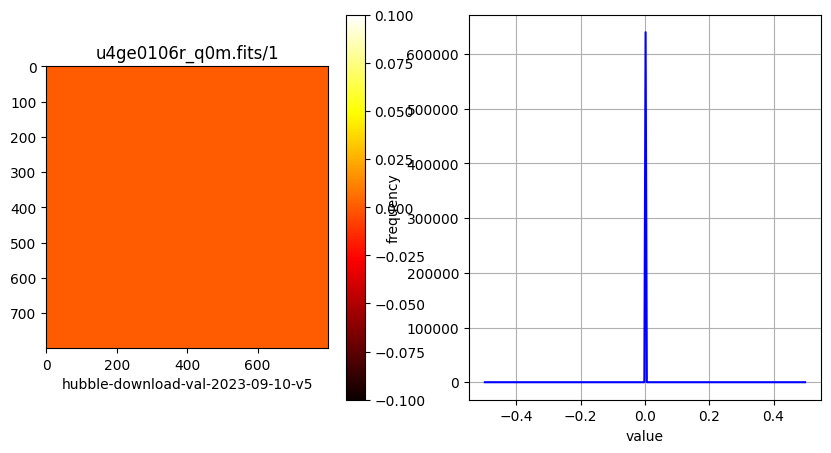

#2: (800, 800)
#2: 0.000 - 0.000
#3: (800, 800)
#3: 0.000 - 0.000
#4: (800, 800)
#4: 0.000 - 0.000


Filename: /Users/kamangir/storage/abcli/hubble-download-val-2023-09-10-v5/u4ge0106r_c3t.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       7   ()      
  1  u4ge0106r.c3t    1 BinTableHDU     39   10000R x 5C   [1E, 1E, 1E, 1E, 1E]   


hubble.load_fit_file(/Users/kamangir/storage/abcli/hubble-download-val-2023-09-10-v5/u4ge0106r_c3t.fits): 2 item(s)
#0: Null
#1: (10000,)
skipped.


Filename: /Users/kamangir/storage/abcli/hubble-download-val-2023-09-10-v5/u4ge0106r_c1m.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     215   ()      
  1  SCI           1 ImageHDU       107   (800, 800)   int16   
  2  SCI           2 ImageHDU       107   (800, 800)   int16   
  3  SCI           3 ImageHDU       107   (800, 800)   int16   
  4  SCI           4 ImageHDU       107   (800, 800)   int16   


hubble.load_fit_file(/Users/kamangir/storage/abcli/hubble-download-val-2023-09-10-v5/u4ge0106r_c1m.fits): 5 item(s)
#0: Null
#1: (800, 800)
#1: 0.000 - 2.000


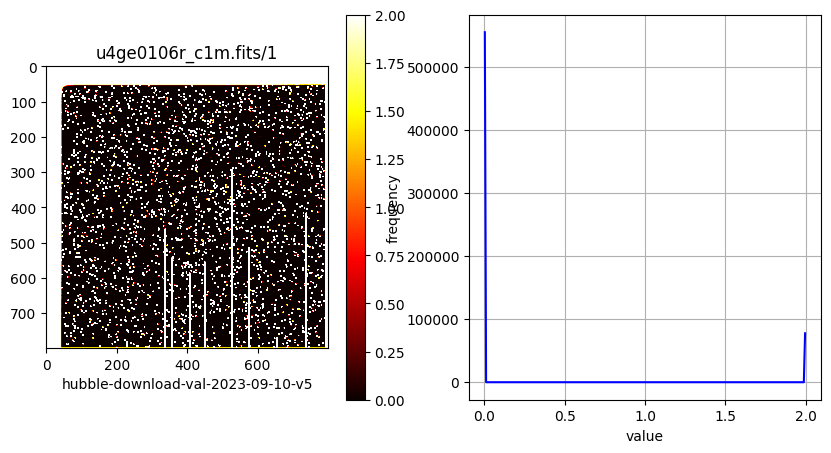

#2: (800, 800)
#2: 0.000 - 2.000
#3: (800, 800)
#3: 0.000 - 2.000
#4: (800, 800)
#4: 0.000 - 2.000


Filename: /Users/kamangir/storage/abcli/hubble-download-val-2023-09-10-v5/u4ge0106r_shf.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     362   (965,)   int16   
  1  u4ge0106r_cvt.shh.tab    1 TableHDU        31   1R x 3C   [I12, I12, D25.17]   


hubble.load_fit_file(/Users/kamangir/storage/abcli/hubble-download-val-2023-09-10-v5/u4ge0106r_shf.fits): 2 item(s)
#0: (965,)
skipped.
#1: (1,)
skipped.


Filename: /Users/kamangir/storage/abcli/hubble-download-val-2023-09-10-v5/u4ge0106r_q1f.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      65   (14, 800, 4)   int16   
  1  u4ge0106r_cvt.q1h.tab    1 TableHDU        31   4R x 3C   [I12, I12, I12]   


hubble.load_fit_file(/Users/kamangir/storage/abcli/hubble-download-val-2023-09-10-v5/u4ge0106r_q1f.fits): 2 item(s)
#0: (4, 800, 14)
skipped.
#1: (4,)
skipped.


Filename: /Users/kamangir/storage/abcli/hubble-download-val-2023-09-10-v5/u4ge0106r_c0f.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     305   (800, 800, 4)   float32   
  1  u4ge0106r_cvt.c0h.tab    1 TableHDU       402   4R x 56C   [D25.17, D25.17, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, A1, E15.7, I12, I12, D25.17, D25.17, A8, A8, I12, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, I12, I12, I12, I12, I12, I12, I12, I12, A48, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7]   


hubble.load_fit_file(/Users/kamangir/storage/abcli/hubble-download-val-2023-09-10-v5/u4ge0106r_c0f.fits): 2 item(s)
#0: (4, 800, 800)
skipped.
#1: (4,)
skipped.


Filename: /Users/kamangir/storage/abcli/hubble-download-val-2023-09-10-v5/u4ge0106r_cgr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       7   ()      
  1  u4ge0106r.cgr    1 TableHDU        12   196R x 1C   [A132]   


hubble.load_fit_file(/Users/kamangir/storage/abcli/hubble-download-val-2023-09-10-v5/u4ge0106r_cgr.fits): 2 item(s)
#0: Null
#1: (196,)
skipped.


Filename: /Users/kamangir/storage/abcli/hubble-download-val-2023-09-10-v5/u4ge0106j_jit.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      22   ()      
  1  jit           1 BinTableHDU    100   233R x 28C   [E, E, E, E, E, E, E, E, E, E, E, D, D, D, E, E, E, E, E, E, E, E, E, E, I, I, I, I]   


hubble.load_fit_file(/Users/kamangir/storage/abcli/hubble-download-val-2023-09-10-v5/u4ge0106j_jit.fits): 2 item(s)
#0: Null
#1: (233,)
skipped.


Filename: /Users/kamangir/storage/abcli/hubble-download-val-2023-09-10-v5/u4ge0106r_x0m.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      46   ()      
  1  EXT           1 ImageHDU        27   (14, 800)   int16   
  2  EXT           2 ImageHDU        27   (14, 800)   int16   
  3  EXT           3 ImageHDU        27   (14, 800)   int16   
  4  EXT           4 ImageHDU        27   (14, 800)   int16   


hubble.load_fit_file(/Users/kamangir/storage/abcli/hubble-download-val-2023-09-10-v5/u4ge0106r_x0m.fits): 5 item(s)
#0: Null
#1: (800, 14)
#1: 0.000 - 341.000


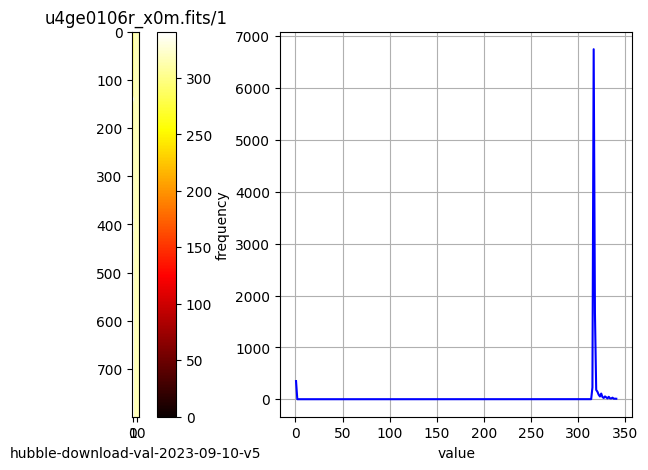

#2: (800, 14)
#2: 0.000 - 16630.050
#3: (800, 14)
#3: -32208.050 - 317.000
#4: (800, 14)
#4: -16238.050 - 320.000


Filename: /Users/kamangir/storage/abcli/hubble-download-val-2023-09-10-v5/u4ge0106r_trl.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1  trl           1 TableHDU        12   156R x 1C   [A132]   


hubble.load_fit_file(/Users/kamangir/storage/abcli/hubble-download-val-2023-09-10-v5/u4ge0106r_trl.fits): 2 item(s)
#0: Null
#1: (156,)
skipped.


Filename: /Users/kamangir/storage/abcli/hubble-download-val-2023-09-10-v5/u4ge0106r_d0f.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     263   (800, 800, 4)   int16   
  1  u4ge0106r_cvt.d0h.tab    1 TableHDU       402   4R x 56C   [D25.17, D25.17, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, A1, E15.7, I12, I12, D25.17, D25.17, A8, A8, I12, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, I12, I12, I12, I12, I12, I12, I12, I12, A48, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7]   


hubble.load_fit_file(/Users/kamangir/storage/abcli/hubble-download-val-2023-09-10-v5/u4ge0106r_d0f.fits): 2 item(s)
#0: (4, 800, 800)
skipped.
#1: (4,)
skipped.


Filename: /Users/kamangir/storage/abcli/hubble-download-val-2023-09-10-v5/u4ge0106r_d0m.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     191   ()      
  1  SCI           1 ImageHDU        93   (800, 800)   int16   
  2  SCI           2 ImageHDU        93   (800, 800)   int16   
  3  SCI           3 ImageHDU        93   (800, 800)   int16   
  4  SCI           4 ImageHDU        93   (800, 800)   int16   


hubble.load_fit_file(/Users/kamangir/storage/abcli/hubble-download-val-2023-09-10-v5/u4ge0106r_d0m.fits): 5 item(s)
#0: Null
#1: (800, 800)
#1: 317.000 - 323.000


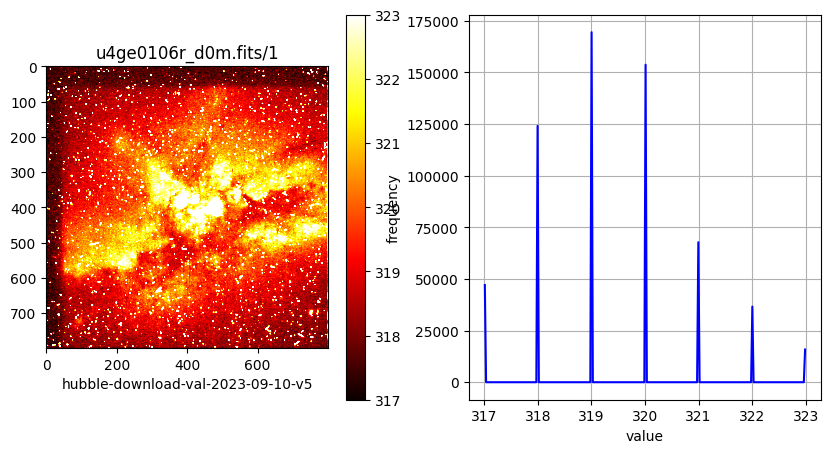

#2: (800, 800)
#2: 354.000 - 360.000
#3: (800, 800)
#3: 307.000 - 311.000
#4: (800, 800)
#4: 311.000 - 317.000


Filename: /Users/kamangir/storage/abcli/hubble-download-val-2023-09-10-v5/u4ge0106r_x0f.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      65   (14, 800, 4)   int16   
  1  u4ge0106r_cvt.x0h.tab    1 TableHDU        31   4R x 3C   [I12, I12, I12]   


hubble.load_fit_file(/Users/kamangir/storage/abcli/hubble-download-val-2023-09-10-v5/u4ge0106r_x0f.fits): 2 item(s)
#0: (4, 800, 14)
skipped.
#1: (4,)
skipped.


Filename: /Users/kamangir/storage/abcli/hubble-download-val-2023-09-10-v5/u4ge0106j_jif.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     107   ()      
  1  jit           1 ImageHDU        90   (64, 64)   int32   


hubble.load_fit_file(/Users/kamangir/storage/abcli/hubble-download-val-2023-09-10-v5/u4ge0106j_jif.fits): 2 item(s)
#0: Null
#1: (64, 64)
#1: 0.000 - 5.000


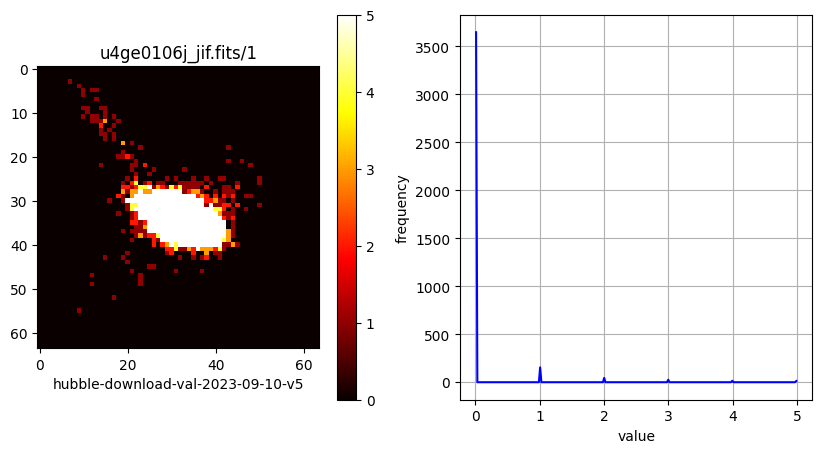

Filename: /Users/kamangir/storage/abcli/hubble-download-val-2023-09-10-v5/u4ge0106r_pdq.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       7   ()      
  1  u4ge0106r.pdq    1 TableHDU        12   59R x 1C   [A132]   


hubble.load_fit_file(/Users/kamangir/storage/abcli/hubble-download-val-2023-09-10-v5/u4ge0106r_pdq.fits): 2 item(s)
#0: Null
#1: (59,)
skipped.


True

In [6]:
ingest(object_name)

---

In [7]:
%%bash -s $object_name
source ~/git/awesome-bash-cli/bash/abcli.sh in_notebook

object_name=$1

abcli select $object_name
abcli tag set . built_by_notebook
abcli upload

📂 abcli: hubble-download-val-2023-09-10-v5


hubble-download-val-2023-09-10-v5 += #built_by_notebook.


confirmed: hubble-download-val-2023-09-10-v5 does not exist.
hubble-download-val-2023-09-10-v5 open upload started.
upload: ./abcli.log to s3://kamangir/bolt/hubble-download-val-2023-09-10-v5/abcli.log
upload: ./u4ge0106j_jif--analysis-1.png to s3://kamangir/bolt/hubble-download-val-2023-09-10-v5/u4ge0106j_jif--analysis-1.png
upload: ./u4ge0106r_c1m--analysis-3.png to s3://kamangir/bolt/hubble-download-val-2023-09-10-v5/u4ge0106r_c1m--analysis-3.png
upload: ./u4ge0106r_c1m--analysis-4.png to s3://kamangir/bolt/hubble-download-val-2023-09-10-v5/u4ge0106r_c1m--analysis-4.png
upload: ./u4ge0106r_c1m--analysis-2.png to s3://kamangir/bolt/hubble-download-val-2023-09-10-v5/u4ge0106r_c1m--analysis-2.png
upload: ./u4ge0106r_c1m--analysis-1.png to s3://kamangir/bolt/hubble-download-val-2023-09-10-v5/u4ge0106r_c1m--analysis-1.png
upload: ./u4ge0106r_c0m--analysis-2.png to s3://kamangir/bolt/hubble-download-val-2023-09-10-v5/u4ge0106r_c0m--analysis-2.png
upload: ./u4ge0106r_c0m--analysis-1.png to

hubble-download-val-2023-09-10-v5 += #open.


In [8]:
seed.log("download_object")

abcli select hubble-download-val-2023-09-10-v5
abcli download
open .


In [9]:
# END